## To match left and right SWR

In [28]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
from scipy import fftpack
import pandas as pd
from pathlib import Path

%matplotlib widget

folder_base = Path('/Users/ahay/Documents/DATA/NecabChR2/Baseline5sec/EVIL2')

filenamel = folder_base / f'ca1SWRproperties.csv' #
filenamer = folder_base / f'periSWRproperties.csv' #

Eventsl = pd.read_csv(filenamel)
Eventsr = pd.read_csv(filenamer)


In [29]:
numptsl = len(Eventsl)
numptsr = len(Eventsr)
EventsrP = Eventsr["peak time"]
EventslP = Eventsl["peak time"]

matdist = np.empty((numptsl, numptsr), dtype=float)
for i in range(numptsl):
    for j in range(numptsr):
        matdist[i,j] = abs(EventslP[i]- EventsrP[j])

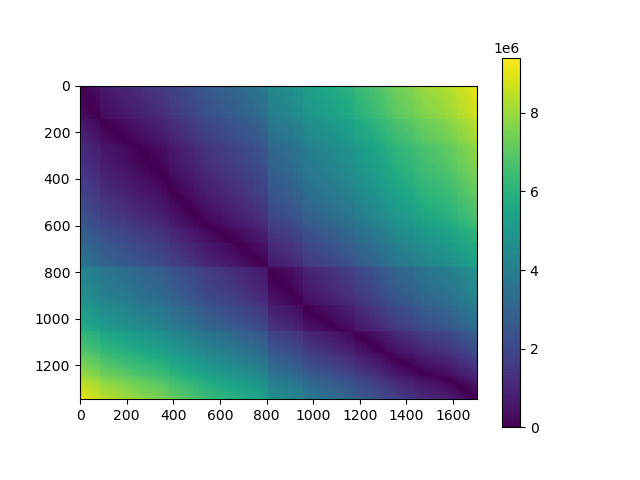

In [65]:
plt.close()
im = plt.imshow(matdist)
plt.colorbar(im)
plt.show()

In [30]:
mindistl = EventslP.copy()
for i in range(numptsl):
    mindistl[i] = min(matdist[i,:])

mindistr = EventsrP.copy()
for i in range(numptsr):
    mindistr[i] = min(matdist[:,i])



In [31]:
OverlapR = len([e for e, elem in enumerate(mindistr) if elem < 300])
PerOverlapR = OverlapR/len(mindistr)
OverlapL = len([e for e, elem in enumerate(mindistl) if elem < 300])
PerOverlapL = OverlapL/len(mindistl)
print(PerOverlapL, PerOverlapR)



0.43445544554455445 0.3350871423873726


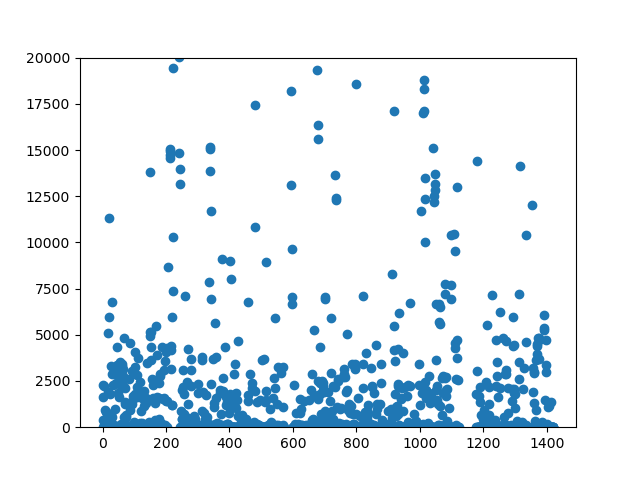

In [19]:
x = np.linspace(0, len(mindistr), num=len(mindistr))
plt.close()
fig, ax = plt.subplots()
ax.plot(x, mindistr, marker='o',linestyle='')
ax.set_ylim(0,20000)
#ax.set_yscale('symlog')
filename = folder_base / f'DistanceRight2205.svg'
#plt.savefig(filename, format="svg")
plt.show()


In [20]:

filename3 = folder_base / f'SignalCA1.npy'
filename4 = folder_base / f'SignalPERI.npy'

CA1l = np.load(filename4, mmap_mode= 'r')
CA1r = np.load(filename3, mmap_mode= 'r')


A = np.concatenate((CA1l, CA1r), axis = 1)

# use the choice method of the Generator class
rng = np.random.default_rng()
A_sampled = rng.choice(A, 1000)

Points_CA1l = A_sampled[:,1]
Points_CA1r = A_sampled[:,3]

In [21]:
r = np.corrcoef(Points_CA1l, Points_CA1r)
r

array([[1.        , 0.49226867],
       [0.49226867, 1.        ]])

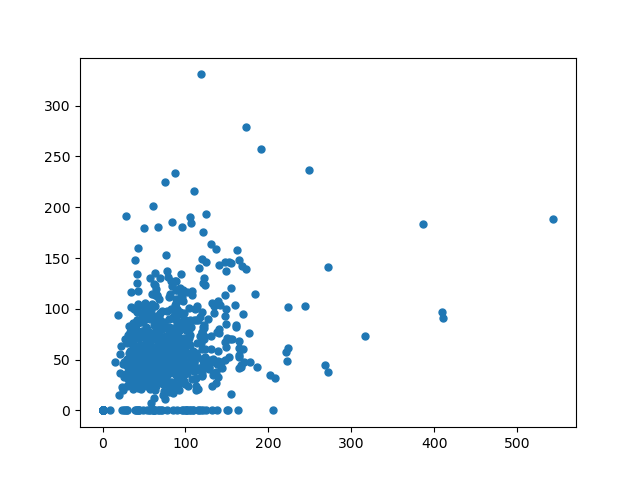

In [22]:
plt.close()
plt.plot(Points_CA1l, Points_CA1r, linestyle = '', marker = 'o', markersize = 5)

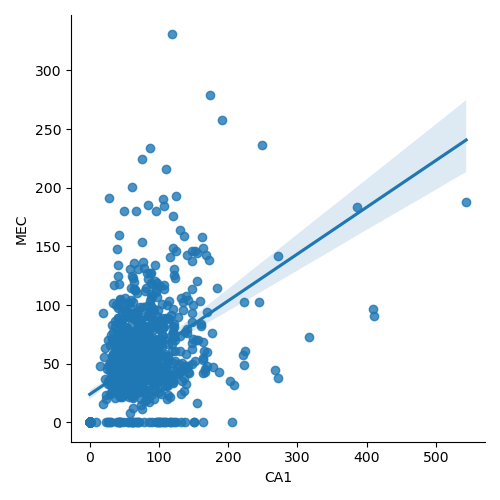

In [23]:
import seaborn as sns
filename = folder_base / f'Correl2205.svg'
A = {"CA1": Points_CA1l, "MEC": Points_CA1r}
df = pd.DataFrame(data=A)

sns.scatterplot(x="CA1", y="MEC", data=df)
sns.lmplot(x="CA1", y="MEC", data=df)
#plt.savefig(filename, format="svg")
plt.show()

In [24]:
from scipy import stats
stats.pearsonr(Points_CA1l, Points_CA1r)

PearsonRResult(statistic=0.49226867431981425, pvalue=3.713009708481995e-62)

In [26]:

start = 1606000
end = 1616000

filename3 = folder_base / f'LFPwake0.npy'
filename4 = folder_base / f'SignalCA1.npy'
filename5 = folder_base / f'SignalPERI.npy'
WakeRem = np.load(filename3, mmap_mode= 'r')
SubstProjL = np.load(filename4, mmap_mode= 'r')
SubstProjR = np.load(filename5, mmap_mode= 'r')
TraceR = WakeRem[start:end,24]
TraceL = WakeRem[start:end,22]
TraceFiltR = SubstProjR[start:end,0]
TraceFiltL = SubstProjL[start:end,0]
ProjL = SubstProjL[start:end,1]
ProjR = SubstProjR[start:end,1]
EMG = WakeRem[start:end,6]

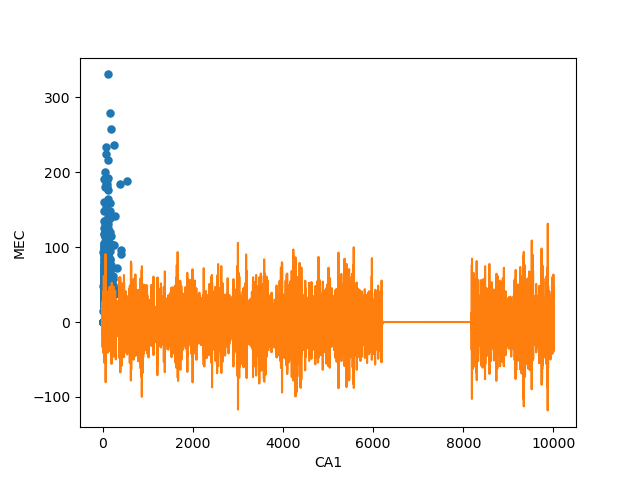

In [27]:
time = np.linspace(0, (end-start), num=(end-start))
# Filter parameter :
f_lowcut = 200.
f_hicut = 400.
N = 4
fs = 1000
nyq = 0.5 * fs
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


# Filter creation :
b, a = signal.butter(N, Wn, 'band')
filt_EMG = signal.filtfilt(b, a, EMG)

plt.close()
filename = folder_base / f'EMG2204_2.svg'
plt.plot(time, filt_EMG)
#plt.savefig(filename, format="svg")
plt.show()

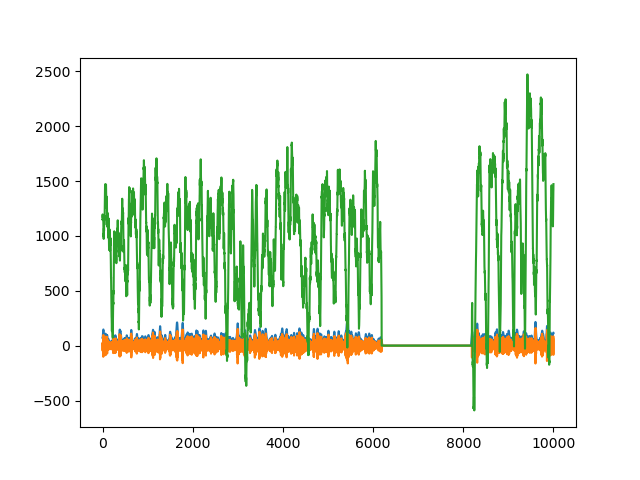

In [28]:
time = np.linspace(0, (end-start), num=(end-start))
plt.close()
filename = folder_base / f'test.svg'
plt.plot(time, ProjR*1)
plt.plot(time, TraceFiltR)
plt.plot(time, TraceR)
#plt.savefig(filename, format="svg")
plt.show()

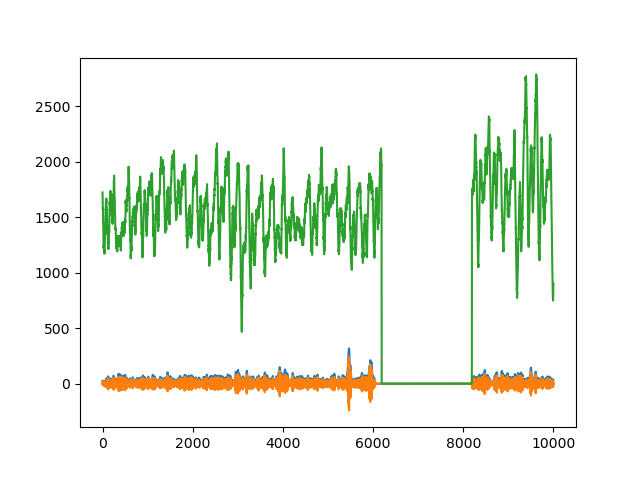

In [29]:
time = np.linspace(0, (end-start), num=(end-start))
plt.close()
filename = folder_base / f'LTraces2205_2.svg'
plt.plot(time, ProjL*1)
plt.plot(time, TraceFiltL)
plt.plot(time, TraceL)
#plt.savefig(filename, format="svg")
plt.show()

In [32]:
indexSWRca1 = []
indexSWRca1 = [e for e, elem in enumerate(mindistl) if elem < 300]


In [33]:
Eventslcoor = Eventsl.iloc[indexSWRca1, :]

In [34]:

#Eventslcoor.reset_index(inplace=True)
#Eventslcoor = Eventslcoor.drop('Unnamed: 0', axis=1)
#Eventslcoor = Eventslcoor.drop('level_0', axis=1)
Eventslcoor

,Unnamed: 0,peak time,Duration,peak amp,start time,end time,Max freq,Max int,Avg freq,Avg int
0,0,13411.0,62.0,96.0,13391.0,13453.0,196.0,412.0,160.0,178.0
22,23,1007653.0,58.0,169.0,1007633.0,1007691.0,199.0,883.0,157.0,339.0
30,31,1023340.0,52.0,95.0,1023316.0,1023368.0,199.0,473.0,152.0,181.0
31,32,1023995.0,62.0,114.0,1023956.0,1024018.0,199.0,583.0,152.0,232.0
32,33,1024203.0,47.0,128.0,1024183.0,1024230.0,196.0,552.0,151.0,217.0
...,...,...,...,...,...,...,...,...,...,...
2510,3063,11080374.0,69.0,129.0,11080335.0,11080404.0,196.0,535.0,156.0,222.0
2518,3075,11116891.0,90.0,136.0,11116822.0,11116912.0,199.0,605.0,153.0,212.0
2519,3076,11117029.0,46.0,160.0,11117008.0,11117055.0,199.0,858.0,152.0,337.0
2520,3078,11122499.0,72.0,102.0,11122477.0,11122549.0,198.0,520.0,157.0,182.0


In [36]:
filename3 = folder_base / f'pCOORDca1SWRproperties.csv'


Eventslcoor.to_csv(filename3, sep = ',')